In [ ]:
"""
Terminologies
-------------
alpha - Critical value of p at which to reject the null hypothesis
power - probability of detecting the effect / probability we correctly reject null hypothesis if alternative hypothesis is true
Effect size - Depature from null hypothesis / Minimum detectable difference/effect
p-value - likelihood of observed pattern under null hypothesis /lesser the p-value, higher the change it is from alternative hypothesis

"""

In [14]:
import pandas as pd
import numpy as np
import plotnine as p9
from statsmodels.stats import power as pwr

In [13]:
# 1. Sample size calculation for two sample independent t-tests
#TTestIndPower() should be used for ttest_ind()
analysis = pwr.TTestIndPower()
ssresult = analysis.solve_power(
     effect_size = 0.05
    ,alpha = 0.05
    ,power = 0.8
    ,ratio = (20/80) # Control 80% and Test 20%
    ,nobs1 = None
)
print(ssresult)

15699.257980969065


In [16]:
# Checking the relationship between power and sample size
df = pd.DataFrame(
    {
        'power':[(i/100) + 0.01 for i in np.arange(100)],
        'effect_size':[ 0.05 + (i * 0.05) for i in np.arange(100)],
        'sample_size':[0 for i in np.arange(100)]
    }
)
print (df.head())

   power  effect_size  sample_size
0   0.01         0.05            0
1   0.02         0.10            0
2   0.03         0.15            0
3   0.04         0.20            0
4   0.05         0.25            0


   power  effect_size  sample_size
0   0.01         0.05     392445.0
1   0.02         0.10      98113.0
2   0.03         0.15      43607.0
3   0.04         0.20      24530.0
4   0.05         0.25      15700.0


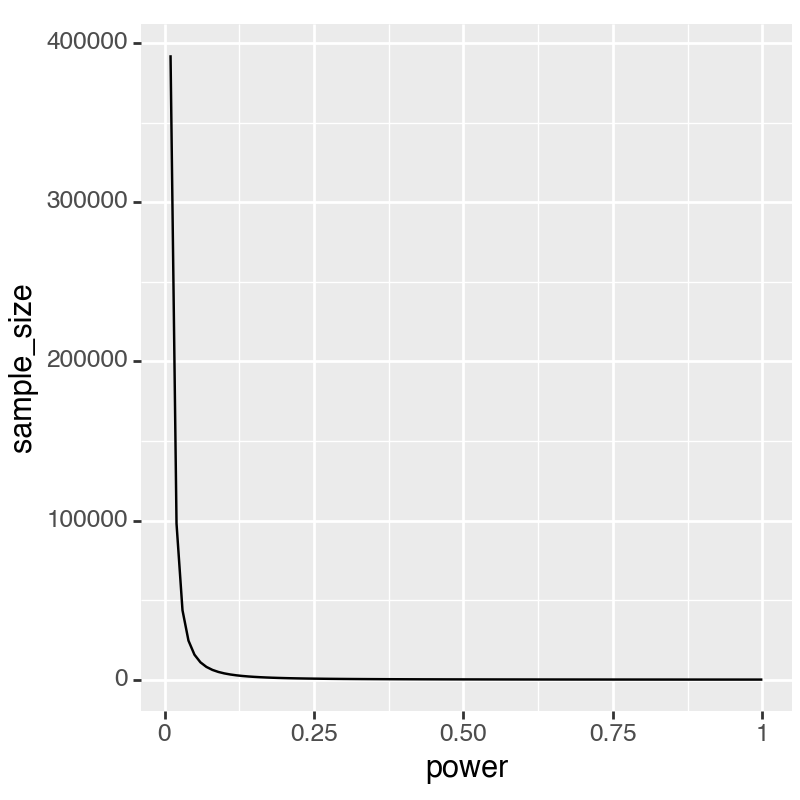

In [27]:
analysis = pwr.TTestIndPower()
def power_analysis(val):
    
    return(np.ceil(analysis.solve_power(
         effect_size = val
        ,alpha = 0.05
        ,power = 0.8
        ,ratio = (20/80) # Control 80% and Test 20%
        ,nobs1 = None
    )))

df['sample_size'] = df['power'].apply(power_analysis)
print(df.head())

print(p9.ggplot(df)
     +p9.aes(x='power',y='sample_size')
     +p9.geom_line()
     +p9.theme(figure_size=(4,4))
)

In [ ]:
#MultiTest - Correction Techniques
#Boneferri - if the groups comparison are depedent
#sidak's Correction - if the group comparison are independent

In [31]:
import pandas as pd
import numpy as np
import statsmodels as sm
from scipy import stats

In [38]:
Array1 = np.array([i + 1 for i in np.arange(100)])
Array2 = np.array([i + 1 for i in np.arange(100)])
Array3 = np.array([i + 1 for i in np.arange(100)])
Array4 = np.array([i + 1 for i in np.arange(100)])
Array5 = np.array([i + 1 for i in np.arange(100)])
Array6 = np.array([i + 1 for i in np.arange(100)])

In [34]:
# method ='b' stands for boneferre corrections
t_1= stats.ttest_ind(Array1, Array2)
t_2= stats.ttest_ind(Array2, Array3)
t_3= stats.ttest_ind(Array1, Array3)

pvals_array = [t_1[1],t_2[1],t_3[1]]
adjustedvalues=  sm.stats.multitest.multipletests(pvals_array, alpha=0.05, method='b')
print(adjustedvalues)

(array([False, False, False]), array([1., 1., 1.]), 0.016952427508441503, 0.016666666666666666)


In [39]:
# method ='s' stands for sidak's
t_1= stats.ttest_ind(Array1, Array2)
t_2= stats.ttest_ind(Array3, Array4)
t_3= stats.ttest_ind(Array5, Array6)

pvals_array = [t_1[1],t_2[1],t_3[1]]
adjustedvalues=  sm.stats.multitest.multipletests(pvals_array, alpha=0.05, method='s')
print(adjustedvalues)

(array([False, False, False]), array([1., 1., 1.]), 0.016952427508441503, 0.016666666666666666)
